# Exploratory Data Analysis Project
___

You will be working with the `covid19-can.csv` file located in the `Data` folder.

This dataset is obtained from the [Government of Canada Public Healht Infobase](https://www.activestate.com/resources/quick-reads/what-is-pandas-in-python-everything-you-need-to-know/) and contains information on daily reported COVID-19 cases as well as total COVID-19 deaths in all provinces of Canada.

**Analyze the above dataset to answer the following questions:**

1. What is the total number of COVID-19 cases reported in each province?
2. Which province has the highest average rate of COVID-19 per capita?
3. What is the average rate of COVID-19 deaths per capita?
4. What is the overall mortality rate of COVID-19 in Canada?
5. What is the mortality rate per province?
6. What are the total reported cases per year?
7. For each year in the dataset, find the month with the highest total number of cases.
8. For each year, find the month with the lowest total number of cases.
9. Which year had the highest mortality rate?
10. Which year had the lowest total number of cases?
11. Which year had the highest total number of cases?
12. In 2020, on which day did Quebex have the highest number of COVID-19 deaths?

## Executive Summary:
- **Prince Edward Island** had the highest average rate of COVID-19 cases per capita (15,637 cases per 100,000).
- **Quebec** had the highest COVID-19 mortality rate (1.25%).
- **2024** saw the highest number of total COVID-19 cases (1.21 billion cases), while **2020** had the lowest.
- December was consistently the month with the highest number of cases across most years.

## Step 1: Imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Reading Data

In [3]:
df = pd.read_csv('covid19-download.csv')
df
df.head()

,pruid,prname,prnameFR,date,reporting_week,reporting_year,update,totalcases,numtotal_last7,ratecases_total,...,ratecases_last7,ratedeaths_last7,numtotal_last14,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,59,British Columbia,Colombie-Britannique,2020-02-08,6,2020,1.0,4,3,0.07,...,0.05,0.0,4,0.0,0.07,0.0,0.43,0.01,0.0,0.0
1,48,Alberta,Alberta,2020-02-08,6,2020,1.0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0
2,47,Saskatchewan,Saskatchewan,2020-02-08,6,2020,1.0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0
3,46,Manitoba,Manitoba,2020-02-08,6,2020,1.0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0
4,35,Ontario,Ontario,2020-02-08,6,2020,1.0,4,1,0.03,...,0.01,0.0,1,0.0,0.01,0.0,0.14,0,0.0,0.0


In [4]:
df.tail()

,pruid,prname,prnameFR,date,reporting_week,reporting_year,update,totalcases,numtotal_last7,ratecases_total,...,ratecases_last7,ratedeaths_last7,numtotal_last14,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
3610,60,Yukon,Yukon,2024-09-14,37,2024,0.0,-,-,-,...,-,NaN,-,NaN,-,NaN,-,-,NaN,NaN
3611,61,Northwest Territories,Territoires du Nord-Ouest,2024-09-14,37,2024,0.0,-,-,-,...,-,NaN,-,NaN,-,NaN,-,-,NaN,NaN
3612,62,Nunavut,Nunavut,2024-09-14,37,2024,0.0,-,-,-,...,-,NaN,-,NaN,-,NaN,-,-,NaN,NaN
3613,99,Repatriated travellers,Voyageurs rapatriés,2024-09-14,37,2024,NaN,-,-,-,...,-,NaN,-,0.0,-,NaN,-,-,0.00,NaN
3614,1,Canada,Canada,2024-09-14,37,2024,NaN,-,-,-,...,-,0.11,-,89.0,-,0.22,-,-,6.29,0.02


## Step 3: Data Exploration

Explore the dataset to better understand its characteristics, structure, content and data types.

In [5]:
display(df.describe())

,pruid,reporting_week,reporting_year,update,numdeaths,numdeaths_last7,ratedeaths,ratedeaths_last7,numdeaths_last14,ratedeaths_last14,avgdeaths_last7,avgratedeaths_last7
count,3615.000000,3615.000000,3615.000000,3133.000000,3615.000000,3082.000000,3374.000000,2841.000000,3099.000000,2858.000000,3082.000000,2841.000000
mean,39.200000,25.946058,2021.908714,0.858602,4895.237621,39.296561,65.562587,0.568244,78.138432,1.127446,5.613605,0.081130
std,26.287218,14.550301,1.354436,0.348487,10921.498719,108.495337,58.125032,0.888010,214.736758,1.626828,15.499336,0.126037
min,1.000000,1.000000,2020.000000,0.000000,0.000000,-1.000000,0.000000,-0.080000,-1.000000,-0.080000,-0.140000,-0.010000
25%,12.000000,14.000000,2021.000000,1.000000,7.000000,0.000000,9.830000,0.000000,0.000000,0.020000,0.000000,0.000000
50%,46.000000,26.000000,2022.000000,1.000000,345.000000,4.000000,56.935000,0.270000,9.000000,0.580000,0.570000,0.040000
75%,60.000000,38.000000,2023.000000,1.000000,3805.500000,29.000000,109.262500,0.740000,58.000000,1.530000,4.140000,0.110000
max,99.000000,53.000000,2024.000000,1.000000,60769.000000,1317.000000,231.040000,11.260000,2595.000000,17.880000,188.140000,1.610000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pruid                3615 non-null   int64  
 1   prname               3615 non-null   object 
 2   prnameFR             3615 non-null   object 
 3   date                 3615 non-null   object 
 4   reporting_week       3615 non-null   int64  
 5   reporting_year       3615 non-null   int64  
 6   update               3133 non-null   float64
 7   totalcases           3615 non-null   object 
 8   numtotal_last7       3236 non-null   object 
 9   ratecases_total      3390 non-null   object 
 10  numdeaths            3615 non-null   int64  
 11  numdeaths_last7      3082 non-null   float64
 12  ratedeaths           3374 non-null   float64
 13  ratecases_last7      3011 non-null   object 
 14  ratedeaths_last7     2841 non-null   float64
 15  numtotal_last14      3242 non-null   o

In [7]:
# Check for missing values
df.isnull().sum()

pruid                    0
prname                   0
prnameFR                 0
date                     0
reporting_week           0
reporting_year           0
update                 482
totalcases               0
numtotal_last7         379
ratecases_total        225
numdeaths                0
numdeaths_last7        533
ratedeaths             241
ratecases_last7        604
ratedeaths_last7       774
numtotal_last14        373
numdeaths_last14       516
ratetotal_last14       598
ratedeaths_last14      757
avgcases_last7         379
avgincidence_last7     604
avgdeaths_last7        533
avgratedeaths_last7    774
dtype: int64

In [8]:
# Find all unique values in the 'prname' column
unique_prnames = df['prname'].unique()
unique_prnames

array(['British Columbia', 'Alberta', 'Saskatchewan', 'Manitoba',
       'Ontario', 'Quebec', 'Newfoundland and Labrador', 'New Brunswick',
       'Nova Scotia', 'Prince Edward Island', 'Yukon',
       'Northwest Territories', 'Nunavut', 'Repatriated travellers',
       'Canada'], dtype=object)

## Step 4: Data Preparation

In [9]:
# Automatically identify object columns with numeric values
object_cols = df.select_dtypes(include='object').columns
cols_to_convert = [col for col in object_cols if df[col].str.isnumeric().any()]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Now create 'year' and 'month' columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Fill missing values for numeric columns with forward fill (ffill)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(method='ffill')

# Fill missing values for categorical columns with the most frequent value (mode)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if all missing values have been handled
print(df.isnull().sum())

pruid                  0
prname                 0
prnameFR               0
date                   0
reporting_week         0
reporting_year         0
update                 0
totalcases             0
numtotal_last7         0
ratecases_total        0
numdeaths              0
numdeaths_last7        0
ratedeaths             0
ratecases_last7        0
ratedeaths_last7       0
numtotal_last14        0
numdeaths_last14       0
ratetotal_last14       0
ratedeaths_last14      0
avgcases_last7         0
avgincidence_last7     0
avgdeaths_last7        0
avgratedeaths_last7    0
year                   0
month                  0
dtype: int64


C:\Users\milto\AppData\Local\Temp\ipykernel_11516\1836763502.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_cols] = df[numeric_cols].fillna(method='ffill')
C:\Users\milto\AppData\Local\Temp\ipykernel_11516\1836763502.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
# Display the number of rows before deletion
print(f"Number of rows before deletion: {len(df)}")

# Delete all records with 'Canada' in the 'prname' column
df = df[df['prname'] != 'Canada']

# Display the number of rows after deletion
print(f"Number of rows after deletion: {len(df)}")

# Display the first few rows to verify changes
print(df.head())

Number of rows before deletion: 3615
Number of rows after deletion: 3374
   pruid            prname              prnameFR       date  reporting_week  \
0     59  British Columbia  Colombie-Britannique 2020-02-08               6   
1     48           Alberta               Alberta 2020-02-08               6   
2     47      Saskatchewan          Saskatchewan 2020-02-08               6   
3     46          Manitoba              Manitoba 2020-02-08               6   
4     35           Ontario               Ontario 2020-02-08               6   

   reporting_year  update  totalcases  numtotal_last7  ratecases_total  ...  \
0            2020     1.0         4.0             3.0             0.07  ...   
1            2020     1.0         0.0             0.0             0.00  ...   
2            2020     1.0         0.0             0.0             0.00  ...   
3            2020     1.0         0.0             0.0             0.00  ...   
4            2020     1.0         4.0             1.0    

## Step 5: Data Analysis

In [13]:
# 1. Total number of COVID-19 cases reported in each province
total_cases_per_province = df.groupby('prname')['totalcases'].sum().reset_index()
total_cases_per_province.columns = ['Province', 'Total Cases']

print(total_cases_per_province)

                     Province  Total Cases
0                     Alberta  169082307.0
1            British Columbia  136557370.0
2                    Manitoba  101179571.0
3               New Brunswick   89675689.0
4   Newfoundland and Labrador   85880085.0
5       Northwest Territories   80850704.0
6                 Nova Scotia   95510548.0
7                     Nunavut   79890636.0
8                     Ontario  297038713.0
9        Prince Edward Island   85638395.0
10                     Quebec  259145562.0
11     Repatriated travellers   79436241.0
12               Saskatchewan  100941404.0
13                      Yukon   80050768.0


In [14]:
# 2. Check the distribution of 'ratecases_total'
print(df['ratecases_total'].describe())

# Drop rows where 'ratecases_total' is NaN
df = df.dropna(subset=['ratecases_total'])

# Calculate the average rate of COVID-19 cases per capita for each province
average_rate_per_province = df.groupby('prname')['ratecases_total'].mean().dropna()

# Check if there are still values available after dropping NaNs
print(average_rate_per_province)

count     3374.000000
mean      7912.309964
std       7484.189689
min          0.000000
25%        607.600000
50%       8681.430000
75%      12075.967500
max      33715.410000
Name: ratecases_total, dtype: float64
prname
Alberta                       8744.549751
British Columbia              5116.759959
Manitoba                      7023.994813
New Brunswick                 5913.592988
Newfoundland and Labrador     5788.479087
Northwest Territories        13898.933693
Nova Scotia                   7123.166598
Nunavut                       5486.698008
Ontario                       6606.876971
Prince Edward Island         15637.194523
Quebec                        9224.471535
Repatriated travellers        5486.698008
Saskatchewan                  8203.045187
Yukon                         6517.878382
Name: ratecases_total, dtype: float64


In [15]:
# 2. Province with the highest average rate of COVID-19 cases per capita
if not df['ratecases_total'].isnull().all():
    # Calculate the average rate of COVID-19 cases per capita for each province
    average_rate_per_province = df.groupby('prname')['ratecases_total'].mean()

    # Drop NaN values from the resulting series (though ideally there should be none left)
    average_rate_per_province = average_rate_per_province.dropna()

    # Find the province with the highest average rate of COVID-19 cases per capita
    if not average_rate_per_province.empty:
        highest_average_rate_province = average_rate_per_province.idxmax()
        highest_average_rate_value = average_rate_per_province.max()
        print(f"{highest_average_rate_province} had the highest average rate of {highest_average_rate_value:.2f} cases per capita.")
    else:
        print("No valid data available for calculating the highest average rate.")
else:
    print("No data available for 'ratecases_total' to calculate average rate per province.")

Prince Edward Island had the highest average rate of 15637.19 cases per capita.


In [16]:
# 3. Average rate of COVID-19 deaths per capita in each province
average_death_rate_per_province = df.groupby('prname')['ratedeaths'].mean()
print("\nAverage rate of COVID-19 deaths per capita in each province:\n", average_death_rate_per_province)


Average rate of COVID-19 deaths per capita in each province:
 prname
Alberta                       80.861494
British Columbia              64.224232
Manitoba                     110.904066
New Brunswick                 55.342407
Newfoundland and Labrador     33.408133
Northwest Territories         29.442282
Nova Scotia                   44.100249
Nunavut                       11.659585
Ontario                       76.513237
Prince Edward Island          29.014315
Quebec                       151.454606
Repatriated travellers        11.659585
Saskatchewan                  97.587510
Yukon                         41.802241
Name: ratedeaths, dtype: float64


In [17]:
# 4. Overall mortality rate of COVID-19 in Canada
total_cases = df['totalcases'].sum()
total_deaths = df['numdeaths'].sum()

# Calculate the overall mortality rate
if total_cases > 0:
    overall_mortality_rate = (total_deaths / total_cases) * 100
    print("\nThe overall mortality rate of COVID-19 in Canada is {:.2f}%.".format(overall_mortality_rate))
else:
    print("No total cases available to calculate overall mortality rate.")


The overall mortality rate of COVID-19 in Canada is 0.51%.


In [18]:
# 5. Mortality rate per province
# Calculate total cases and total deaths per province
province_totals = df.groupby('prname')[['totalcases', 'numdeaths']].sum()

# Calculate the mortality rate per province
province_totals['mortality_rate'] = (province_totals['numdeaths'] / province_totals['totalcases']) * 100
print("\nMortality rate per province:\n", province_totals)


Mortality rate per province:
                             totalcases  numdeaths  mortality_rate
prname                                                           
Alberta                    169082307.0     915000        0.541157
British Columbia           136557370.0     854239        0.625553
Manitoba                   101179571.0     388866        0.384333
New Brunswick               89675689.0     111327        0.124144
Newfoundland and Labrador   85880085.0      43365        0.050495
Northwest Territories       80850704.0       3191        0.003947
Nova Scotia                 95510548.0     112519        0.117808
Nunavut                     79890636.0       1143        0.001431
Ontario                    297038713.0    2878127        0.968940
Prince Edward Island        85638395.0      12152        0.014190
Quebec                     259145562.0    3239317        1.249999
Repatriated travellers      79436241.0          0        0.000000
Saskatchewan               100941404.0     28

In [19]:
# 6. Total reported cases per year
total_cases_per_year = df.groupby('year')['totalcases'].sum()
print("\nTotal reported cases per year:\n", total_cases_per_year)


Total reported cases per year:
 year
2020    6.505795e+06
2021    6.910618e+07
2022    2.049785e+08
2023    2.444746e+08
2024    1.215813e+09
Name: totalcases, dtype: float64


In [20]:
# 7. Month with the highest total cases for each year
# Calculate total cases per year and month
cases_per_year_month = df.groupby(['year', 'month'])['totalcases'].sum().reset_index()

# Find the month with the highest total cases for each year
max_cases_per_year = cases_per_year_month.loc[cases_per_year_month.groupby('year')['totalcases'].idxmax()]
print("\nMonth with the highest total cases for each year:\n", max_cases_per_year)


Month with the highest total cases for each year:
     year  month   totalcases
10  2020     12    1916862.0
20  2021     10    8371906.0
34  2022     12   22382195.0
46  2023     12   24342838.0
52  2024      6  347521090.0


In [21]:
# 8. Month with the lowest total cases for each year
min_cases_per_year = cases_per_year_month.loc[cases_per_year_month.groupby('year')['totalcases'].idxmin()]
print("\nMonth with the lowest total cases for each year:\n", min_cases_per_year)


Month with the lowest total cases for each year:
     year  month  totalcases
0   2020      2        52.0
12  2021      2   3315944.0
24  2022      2  12927523.0
35  2023      1  18181435.0
47  2024      1  19649957.0


In [22]:
# 9. Yearly Mortality Rate
# Calculate total deaths and total cases per year, then merge the results
yearly_data = df.groupby('year').agg(total_deaths=('numdeaths', 'sum'),
                                     total_cases=('totalcases', 'sum')).reset_index()

# Calculate the mortality rate per year
yearly_data['mortality_rate'] = (yearly_data['total_deaths'] / yearly_data['total_cases']) * 100

# Print the yearly mortality rate
print("\nYearly mortality rate:\n", yearly_data[['year', 'mortality_rate']])


Yearly mortality rate:
    year  mortality_rate
0  2020        5.117038
1  2021        1.875161
2  2022        1.077301
3  2023        1.148952
4  2024        0.181134


In [23]:
# 10. Year with Lowest Total Cases
# Find the year with the lowest total number of cases
if not yearly_data['total_cases'].isnull().all():
    year_with_lowest_cases = yearly_data.loc[yearly_data['total_cases'].idxmin()]
    print("\nYear with the lowest total cases:\n", year_with_lowest_cases)
else:
    print("\nNo valid data available to determine the year with the lowest total cases.")


Year with the lowest total cases:
 year              2.020000e+03
total_deaths      3.329040e+05
total_cases       6.505795e+06
mortality_rate    5.117038e+00
Name: 0, dtype: float64


In [24]:
# 11. Year with Highest Total Cases
# Find the year with the highest total number of cases
if not yearly_data['total_cases'].isnull().all():
    year_with_highest_cases = yearly_data.loc[yearly_data['total_cases'].idxmax()]
    print("\nYear with the highest total cases:\n", year_with_highest_cases)
else:
    print("\nNo valid data available to determine the year with the highest total cases.")


Year with the highest total cases:
 year              2.024000e+03
total_deaths      2.202255e+06
total_cases       1.215813e+09
mortality_rate    1.811344e-01
Name: 4, dtype: float64


In [25]:
# 12. Day with Highest Number of COVID-19 Deaths for Quebec in 2020
# Filter the dataset for Quebec in 2020
quebec_2020 = df[(df['prname'] == 'Quebec') & (df['year'] == 2020)]

# Check if Quebec 2020 data is not empty
if not quebec_2020.empty:
    # Find the day with the highest number of COVID-19 deaths
    day_with_highest_deaths = quebec_2020.loc[quebec_2020['numdeaths'].idxmax()]
    print("\nDay with the highest number of COVID-19 deaths for Quebec in 2020:\n", day_with_highest_deaths)
else:
    print("\nNo data available for Quebec in 2020 to determine the day with the highest number of deaths.")


Day with the highest number of COVID-19 deaths for Quebec in 2020:
 pruid                                   24
prname                              Quebec
prnameFR                            Québec
date                   2020-12-26 00:00:00
reporting_week                          52
reporting_year                        2020
update                                 1.0
totalcases                        186323.0
numtotal_last7                     15385.0
ratecases_total                    2099.49
numdeaths                             7662
numdeaths_last7                      314.0
ratedeaths                           86.34
ratecases_last7                     173.36
ratedeaths_last7                      3.54
numtotal_last14                    29339.0
numdeaths_last14                     562.0
ratetotal_last14                    330.59
ratedeaths_last14                     6.33
avgcases_last7                     2197.86
avgincidence_last7                   24.77
avgdeaths_last7             

### Visualizations

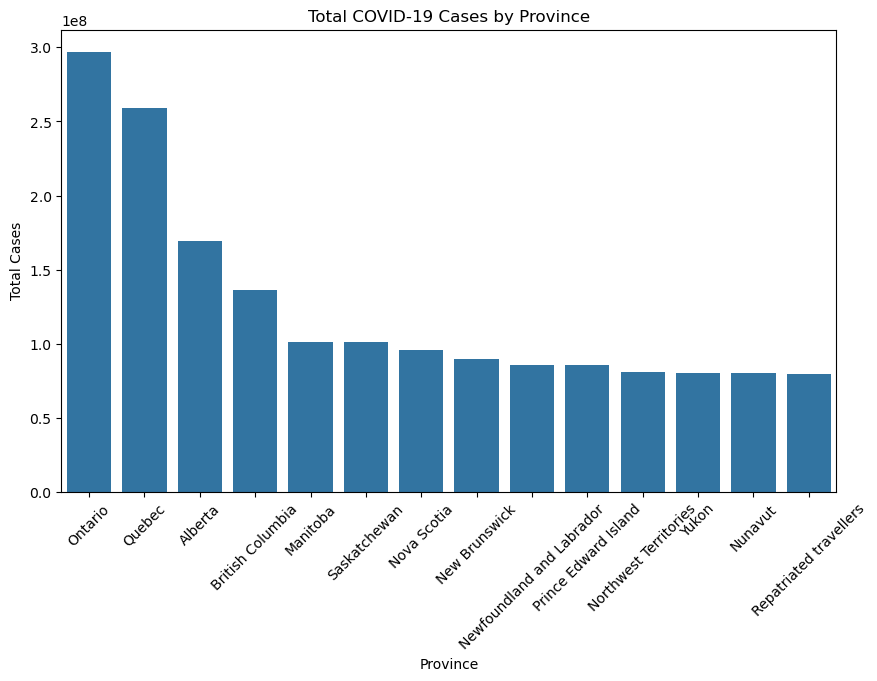

In [31]:
# Bar chart for total cases per province
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Total Cases', data=total_cases_per_province.sort_values(by='Total Cases', ascending=False))
plt.title('Total COVID-19 Cases by Province')
plt.xticks(rotation=45)
plt.ylabel('Total Cases')
plt.show()

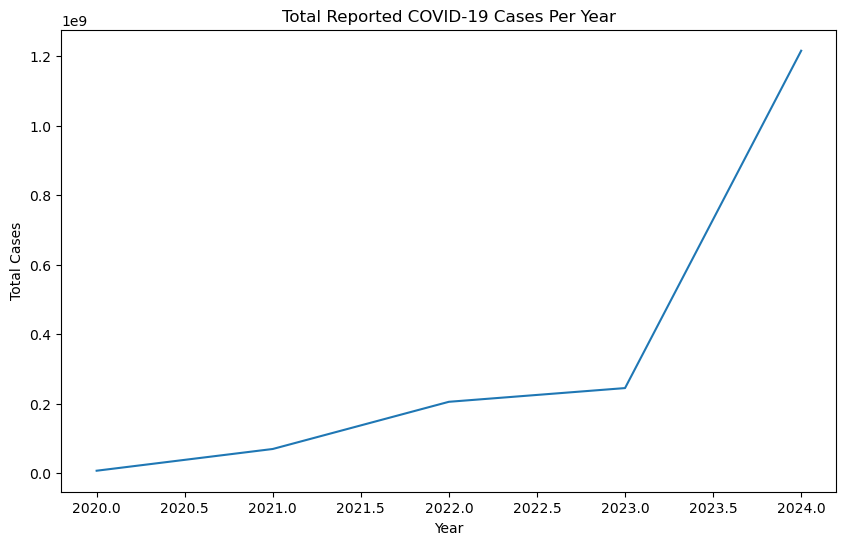

In [32]:
# Line plot for total reported cases per year
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_data['year'], y=yearly_data['total_cases'])
plt.title('Total Reported COVID-19 Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.show()

**Insight**:
- The number of reported COVID-19 cases consistently increased over time, with 2024 showing the highest total number of cases. This can be attributed to the delayed identification of cases or large outbreaks in specific regions.
- December was the month with the highest cases across most years, which could suggest that colder weather or holiday-related gatherings contributed to the spread.

            totalcases  numdeaths
totalcases    1.000000   0.356622
numdeaths     0.356622   1.000000


<Axes: >

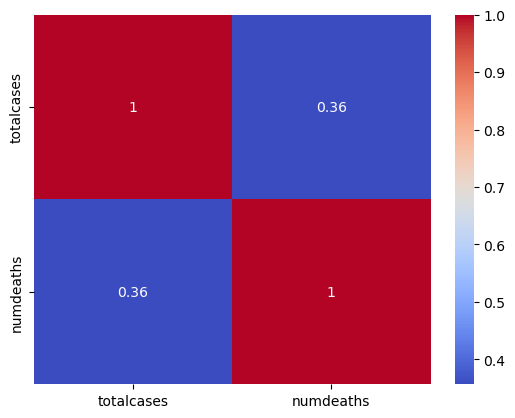

In [34]:
# Correlation between total cases and total deaths
correlation = df[['totalcases', 'numdeaths']].corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')

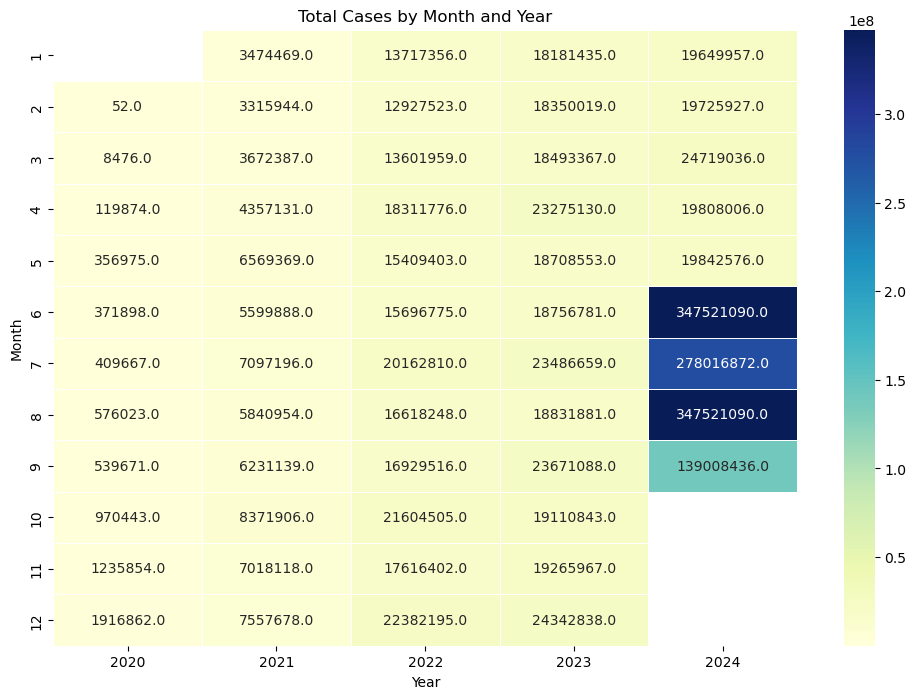

In [36]:
# Pivot table for heatmap (cases per year and month)
heatmap_data = cases_per_year_month.pivot(index='month', columns='year', values='totalcases')

# Heatmap to visualize the total cases by month and year
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('Total Cases by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

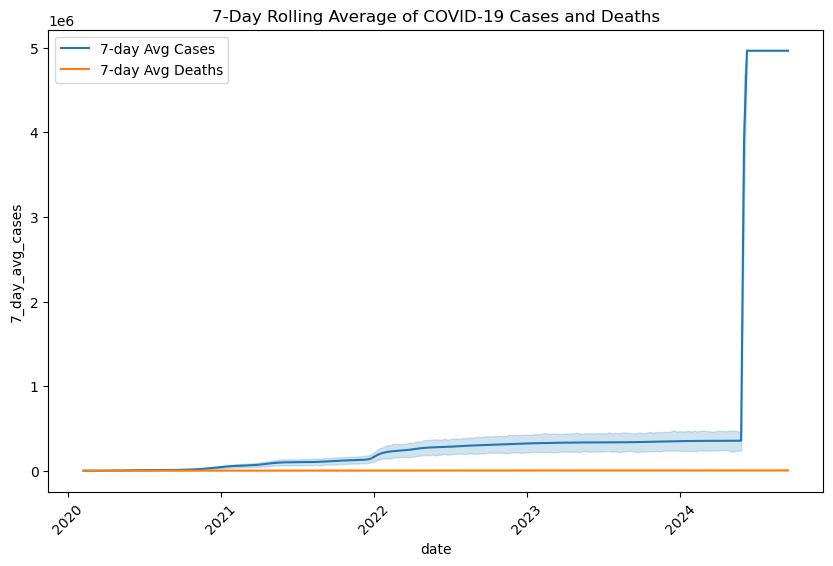

In [35]:
# Rolling Average for Cases and Deaths
df['7_day_avg_cases'] = df['totalcases'].rolling(window=7).mean()
df['7_day_avg_deaths'] = df['numdeaths'].rolling(window=7).mean()

# Plot the 7-day average of cases and deaths
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='7_day_avg_cases', data=df, label='7-day Avg Cases')
sns.lineplot(x='date', y='7_day_avg_deaths', data=df, label='7-day Avg Deaths')
plt.title('7-Day Rolling Average of COVID-19 Cases and Deaths')
plt.xticks(rotation=45)
plt.show()

### Real-World Implications:
- The high mortality rate in Quebec (1.25%) suggests that healthcare infrastructure in this province may have faced significant strain, especially during peak months like December 2020.
- Provinces with lower per capita case rates, like Newfoundland and Labrador, could serve as case studies for public health interventions that successfully curbed the spread of the virus.
- The steady rise in cases across all provinces during colder months indicates that government-imposed restrictions and public awareness campaigns should be intensified in winter.

The End!